**Medical Cost Prediction** 

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (10,6)

In [2]:
data1=pd.read_csv("/content/insurance.csv")
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data1.shape

(1338, 7)

In [5]:
data1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data1['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
data1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
data1['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
data1['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
data1['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
data1['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

**Data Cleaning (handling null values and duplicate values)**

In [14]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
data1.duplicated().sum()

1

In [26]:
data1 = data1.drop_duplicates()
data1.duplicated().sum()

0

**Data Visualization**

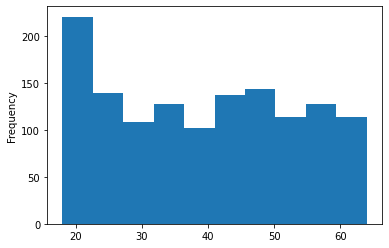

In [28]:
data1.age.plot(kind='hist')

Text(0, 0.5, 'count')

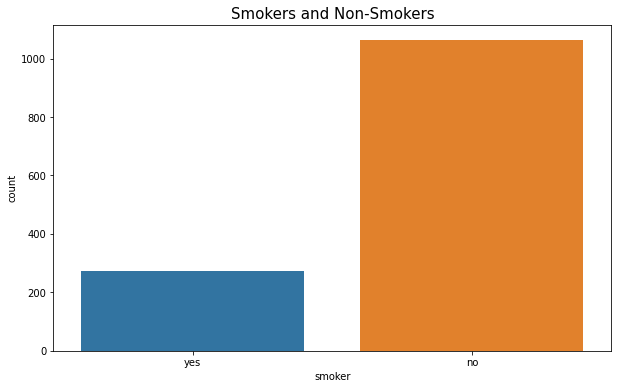

In [43]:
plt.figure(figsize = (10,6))
fig = sns.countplot(x="smoker",data=data1)
fig.set_title("Smokers and Non-Smokers", fontsize=15)
fig.set_xlabel("smoker", fontsize=10)
fig.set_ylabel("count", fontsize=10)

Text(0, 0.5, 'count')

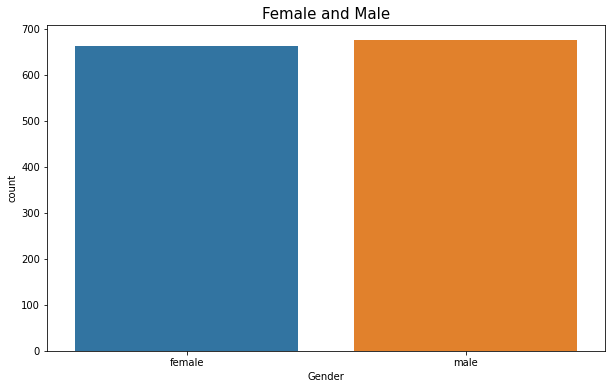

In [44]:
plt.figure(figsize = (10,6))
fig = sns.countplot(x="sex",data=data1)
fig.set_title("Female and Male", fontsize=15)
fig.set_xlabel("Gender", fontsize=10)
fig.set_ylabel("count", fontsize=10)

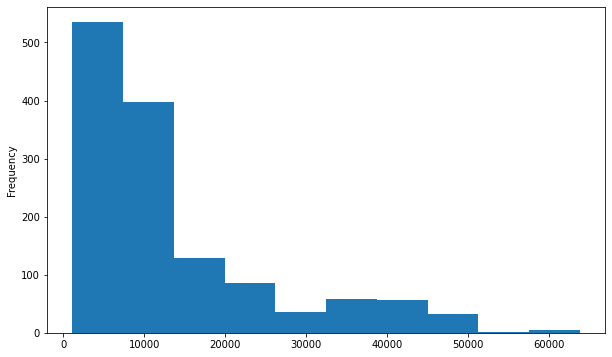

In [45]:
plt.figure(figsize = (10,6))
data1.charges.plot(kind='hist')

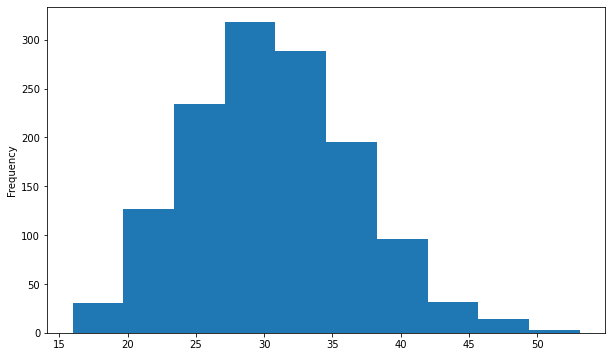

In [51]:
data1.bmi.plot(kind="hist")

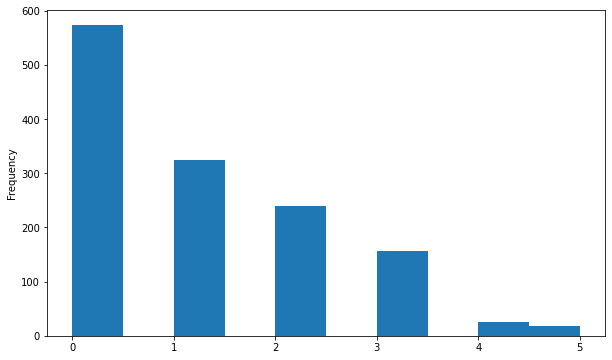

In [47]:
data1.children.plot(kind="hist")

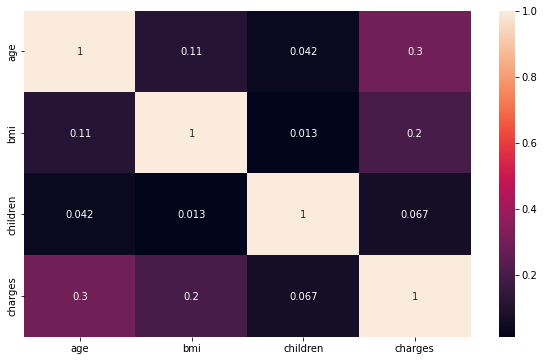

In [48]:
sns.heatmap(data1.corr(),annot=True)

**Using one hot encoding**

In [52]:
dummy1=pd.get_dummies(data1.sex)
dummy1.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [53]:
dummy2=pd.get_dummies(data1.region)
dummy2.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [54]:
dummy3=pd.get_dummies(data1.smoker)
dummy3.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [60]:
data2=pd.concat([data1,dummy1],axis='columns')
data2.drop('sex',axis='columns', inplace=True)
data2.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [61]:
data3=pd.concat([data2,dummy2],axis='columns')
data3.drop('region',axis='columns', inplace=True)
data3.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,1,0,0,0,0,1
1,18,33.770,1,no,1725.55230,0,1,0,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,0,1,0
3,33,22.705,0,no,21984.47061,0,1,0,1,0,0
4,32,28.880,0,no,3866.85520,0,1,0,1,0,0


In [73]:
data4=pd.concat([data3,dummy3],axis='columns')
data4.drop('smoker',axis='columns', inplace=True)
data4.head()

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


**Outliers handling**

Since, children and charges correlation is very less we can remove this column.

In [74]:
data4.drop('children',axis='columns',inplace=True)
data4.head()

,age,bmi,charges,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,3866.85520,0,1,0,1,0,0,1,0


In [85]:
data4[data4.bmi>=47].bmi.count()

9

We can renove the rows having bmi values>=47, since very few

In [88]:
data5=data4[data4.bmi<47]
data5.shape

(1328, 11)

In [90]:
data5[data5.charges>=50000].charges.count()

6

Since frequency of charges>50000 is very less we can also remove them.

In [92]:
data6=data5[data5.charges<50000]
data6.shape

(1322, 11)

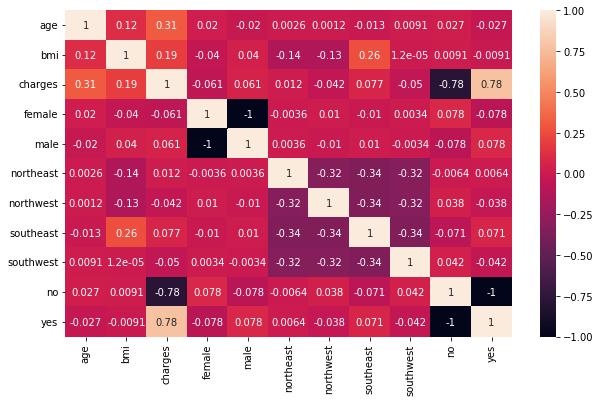

In [96]:
sns.heatmap(data6.corr(),annot=True)

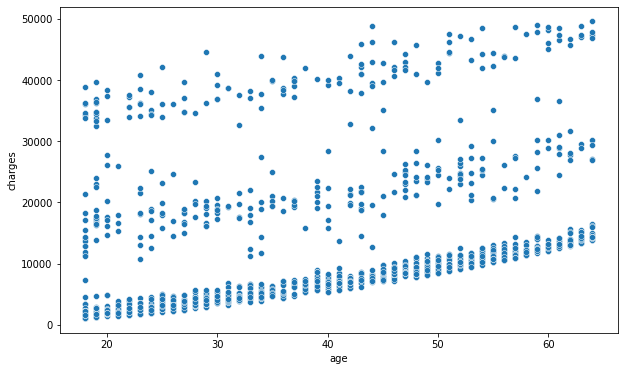

In [101]:
sns.scatterplot(data=data6,x='age',y='charges')

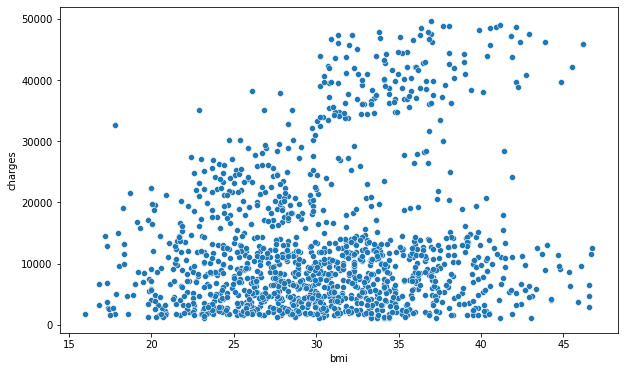

In [102]:
sns.scatterplot(data=data6,x='bmi',y='charges')

Now are data is ready for prediction

**Linear Regression**

In [106]:
X=data6.drop('charges',axis='columns')
X.head()

,age,bmi,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,1,0,0,0,0,1,0,1
1,18,33.770,0,1,0,0,1,0,1,0
2,28,33.000,0,1,0,0,1,0,1,0
3,33,22.705,0,1,0,1,0,0,1,0
4,32,28.880,0,1,0,1,0,0,1,0


In [107]:
Y=data6['charges']
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [108]:
print(X.shape)
print(len(Y))

(1322, 10)
1322


Splitting dataset into traing and testing

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

Fitting into Linear regression

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting result

In [111]:
y_pred=regressor.predict(X_test)
y_pred

array([  943.47375399, 10183.51493351,  6537.5847923 ,  7631.01288788,
        9577.15526451, 13640.2133473 , 15397.76083263, 11453.65171288,
        9645.14384347, 28812.60402061,  8654.05650107,  9509.07764819,
        1752.03506965, 26657.7738168 , 16484.30274349, 33144.24185972,
        2694.52137546,  9553.66164541,  8442.49830587,  4701.21981192,
       33430.51011484, 11033.8771903 ,  2855.98371498,  5371.2793724 ,
       32147.73251857,  6382.81150171, 31336.30375279,  5128.68286349,
        3137.62401853,  4111.01726669, 28799.81163728,  1576.18453828,
       15904.43641546,  4177.21140809, 12376.05192628, 38057.93545376,
        3069.45480041,  6754.60359228, 14088.17894522,  1773.95686241,
       13496.37730925,  2784.93975607,   838.94384449, 12744.38785724,
        8297.81445029, 13706.32146806,  5750.70766565,  3422.58710713,
       11570.88293054,   176.55767244,  7289.42671892, 14042.18755992,
       12516.55587456,  5496.16251388, 36015.33786946, 13530.63385149,
      

Calculating scores of our model

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6912842500024312

**Exporting the model to a picle file**

In [118]:
import pickle
with open('medical_cost_prediction_model.pickle','wb') as f:
    pickle.dump(regressor,f)